# Отток клиентов

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics  import f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 1. Изучение и предобработка данных

In [2]:
df = pd.read_csv ('/datasets/Churn.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
display(df.info())
display(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.query ('Tenure.isnull()')['Geography'].value_counts()

France     464
Spain      229
Germany    216
Name: Geography, dtype: int64

#### столбец Tenure имеет 909 пропусков. Заменим пропуски медианными значениями по странам.

In [7]:
print ("Среднее значение количества недвижимости по Франции:", df.query ('"France" in Geography')['Tenure'].mean())
print ("Медианное значение количества недвижимости по Франции:", df.query ('"France" in Geography')['Tenure'].median())

Среднее значение количества недвижимости по Франции: 5.003956043956044
Медианное значение количества недвижимости по Франции: 5.0


In [8]:
print ("Среднее значение количества недвижимости по Испании:", df.query ('"Spain" in Geography')['Tenure'].mean())
print ("Медианное значение количества недвижимости по Испании:", df.query ('"Spain" in Geography')['Tenure'].median())

Среднее значение количества недвижимости по Испании: 5.001779359430605
Медианное значение количества недвижимости по Испании: 5.0


In [9]:
print ("Среднее значение количества недвижимости по Германии:", df.query ('"Germany" in Geography')['Tenure'].mean())
print ("Медианное значение количества недвижимости по Германии:", df.query ('"Germany" in Geography')['Tenure'].median())

Среднее значение количества недвижимости по Германии: 4.981247274313127
Медианное значение количества недвижимости по Германии: 5.0


####    Как видим, медианные и средние значения по странам практически одинаковы меджу собой, что означает что выбросов нет. Заменим пропущенные значения в столбце Tenure медианным - 5.

In [10]:
df.fillna (5, inplace = True)

####    Удалим столбцы с Фамилиями, Id пользователя и нумерацией строк, т.к. для модели они не несут никакой обучающей информации.

In [11]:
df = df.drop (['RowNumber'], axis=1)
df = df.drop (['Surname'], axis=1)
df = df.drop (['CustomerId'], axis=1)

#### Столбцы Geography и Gender необходимо преобразовать прямым кодированием в численные значения. Чтобы не попасть в dummy_trap удалим первый столбец, т.к. по оставшимся двум его можно восстановить

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

#### Разделим датафрейм на целевой и остальные признаки, поделим на выборки

In [15]:
df_train, df_valid = train_test_split(df, test_size=0.40, random_state = 42)

In [16]:
features_train = df_train.drop ('Exited', axis=1)
display(features_train.shape)
target_train = df_train['Exited']
display(target_train.shape)

(6000, 11)

(6000,)

In [17]:
df_valid, df_test = train_test_split(df_valid, test_size=0.50, random_state = 42)
features_valid = df_valid.drop ('Exited', axis=1)
display(features_valid.shape)
target_valid = df_valid['Exited']
display(target_valid.shape)

(2000, 11)

(2000,)

In [18]:
features_test = df_test.drop ('Exited', axis=1)
display(features_test.shape)
target_test = df_test['Exited']
display(target_test.shape)

(2000, 11)

(2000,)

#### Масштабируем признаки

In [19]:
zoom = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']

In [20]:
scaler = StandardScaler()
scaler.fit(features_train[zoom])
features_train[zoom] = scaler.transform(features_train[zoom])
features_valid[zoom] = scaler.transform(features_valid[zoom])
features_test[zoom] = scaler.transform(features_test[zoom])

In [21]:
display(features_train.head(1))
display(features_train.shape)
display(features_valid.head(1))
display(features_valid.shape)
display(features_test.head(1))
display(features_valid.shape)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9761,1.603068,2.027653,0.012657,-0.048229,0.824078,1,1,-1.452982,1,0,0


(6000, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8113,-2.401689,-0.465343,0.374276,0.236,-0.905967,1,1,-1.542971,0,1,1


(2000, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7072,0.347691,-0.17769,1.459133,0.936984,-0.905967,1,0,-1.275502,0,0,1


(2000, 11)

# 2. Исследование задачи

#### Построим модели без учета баланса классов

#### Модель решающего дерева

In [22]:
for depth in range (1, 18, 3):
    model = DecisionTreeClassifier(random_state = 42, max_depth = depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print("F1 мера на валидационной выборке при Глубине:", depth, "=", f1_score(target_valid, predicted_valid))    

F1 мера на валидационной выборке при Глубине: 1 = 0.0
F1 мера на валидационной выборке при Глубине: 4 = 0.47186932849364793
F1 мера на валидационной выборке при Глубине: 7 = 0.5117056856187291
F1 мера на валидационной выборке при Глубине: 10 = 0.49465648854961836
F1 мера на валидационной выборке при Глубине: 13 = 0.46218487394957986
F1 мера на валидационной выборке при Глубине: 16 = 0.46376811594202894


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
model = DecisionTreeClassifier(random_state = 42, max_depth = 7)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
predicted_train = model.predict(features_train)
print("F1 мера на обучающей выборке:", f1_score(target_train, predicted_train))
print("F1 мера на валидационной выборке",f1_score(target_valid, predicted_valid))
print("Accuracy на валидационной выборке",accuracy_score(target_valid, predicted_valid))

F1 мера на обучающей выборке: 0.6462147451756556
F1 мера на валидационной выборке 0.5117056856187291
Accuracy на валидационной выборке 0.854


#### Модель случайного леса со стандартными параметрами

In [24]:
model = RandomForestClassifier (random_state = 42, n_jobs = -1)
model.fit(features_train,target_train)
predicted_train = model.predict(features_train)
predicted_valid = model.predict(features_valid)
print("F1 мера на обучающей выборке:", f1_score(target_train, predicted_train))
print("F1 мера на валидационной выборке",f1_score(target_valid, predicted_valid))
print("Accuracy на валидационной выборке",accuracy_score(target_valid, predicted_valid))

F1 мера на обучающей выборке: 0.9628378378378378
F1 мера на валидационной выборке 0.5205930807248764
Accuracy на валидационной выборке 0.8545


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Проверим модели на адекватность, делая одно и тоже предсказание

In [25]:
constant_z = pd.Series(0, index=target_valid.index)
constant_o = pd.Series(1, index=target_valid.index)
print('Предсказание нулем:', accuracy_score(target_valid, constant_z))
print('Предсказание единицей:', accuracy_score(target_valid, constant_o))

Предсказание нулем: 0.81
Предсказание единицей: 0.19


In [26]:
target_valid.value_counts()

0    1620
1     380
Name: Exited, dtype: int64

####    Как видно баланс классов составляет ~ 4 к 1. Предсказание нулем практичесеки полностью соответствует предсказаниям нашей модели, что является явным признаком ее неадекватности.

#### Построим матрицу ошибок

In [27]:
confusion_matrix (target_valid, predicted_valid)

array([[1551,   69],
       [ 222,  158]])

####    Как видно, наша модель предсказывает большое количество истинно негативных ответов 

#### Вычислим значения ROC-AUC для нашей базовой модели.

In [28]:
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [29]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

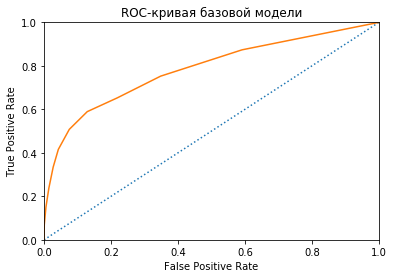

In [30]:
plt.figure()
plt.plot([0, 1], [0, 1], linestyle=':')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая базовой модели')
plt.show()

In [31]:
auc_roc = roc_auc_score (target_valid , probabilities_one_valid)
print(auc_roc)

0.7835672514619882


# 3. Борьба с дисбалансом

#### Применим метод взвешивания классов и сравним F1 меру с полученой ранее

In [32]:
model = DecisionTreeClassifier(random_state = 42, max_depth = 7, class_weight="balanced")
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
print("F1 мера на валидационной выборке:", f1_score(target_valid, predicted_valid))

F1 мера на валидационной выборке: 0.5523385300668152


In [33]:
model = RandomForestClassifier (random_state=42, n_jobs = -1, class_weight="balanced")
model.fit(features_train,target_train)
predicted_train = model.predict(features_train)
predicted_valid = model.predict(features_valid)
print("F1 мера на валидационной выборке", f1_score(target_valid, predicted_valid))

F1 мера на валидационной выборке 0.5016722408026756


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


####    Изменение баланса классов в случае с Деревом решений дало положительный результат.   Однако в случае с моделью случайного леса значение метрики ухудшилось. Применим дургой метод. 

#### Применим технику upsampling для меньшего класса ( 1 )

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 42)
    
    return features_upsampled, target_upsampled

features_TrUp, target_TrUp = upsample(features_train, target_train, 4)

In [35]:
for depth in range (1, 18, 3):
    model = DecisionTreeClassifier(random_state = 42, max_depth = depth)
    model.fit(features_TrUp,target_TrUp)
    predicted_valid = model.predict(features_valid)
    print("F1 мера на валидационной выборке при Глубине:", depth, "=", f1_score(target_valid, predicted_valid))

F1 мера на валидационной выборке при Глубине: 1 = 0.4231433506044905
F1 мера на валидационной выборке при Глубине: 4 = 0.5080875356803044
F1 мера на валидационной выборке при Глубине: 7 = 0.5527192008879023
F1 мера на валидационной выборке при Глубине: 10 = 0.5077399380804954
F1 мера на валидационной выборке при Глубине: 13 = 0.5000000000000001
F1 мера на валидационной выборке при Глубине: 16 = 0.45566502463054187


In [36]:
model = DecisionTreeClassifier(random_state = 42, max_depth = 7)
model.fit(features_TrUp,target_TrUp)
predicted_valid = model.predict(features_valid)
predicted_train = model.predict(features_train)
print("F1 мера на обучающей выборке:", f1_score(target_train, predicted_train))
print("F1 мера на валидационной выборке",f1_score(target_valid, predicted_valid))

F1 мера на обучающей выборке: 0.6544066620402498
F1 мера на валидационной выборке 0.5527192008879023


In [37]:
model = LogisticRegression (solver='liblinear', random_state = 42)
model.fit(features_TrUp,target_TrUp )
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.46379310344827585


####    Данная модель показывает наихудшие результаты, несмотря на скорость ее работы с ней в ТЗ мы не уложимся, переходим к следующей модели.

In [38]:
for depth in range (1, 21, 5):
    for estimators in range (1, 111, 10):
        for split in range (2, 6, 2):
            model = RandomForestClassifier (random_state=42, n_estimators = estimators, max_depth = depth,
                                        n_jobs = -1, min_samples_split = split)
            model.fit(features_TrUp,target_TrUp )
            predicted_train = model.predict(features_train)
            predicted_valid = model.predict(features_valid)
            print('$На обучающей$ Деревьев:',estimators, 'Глубина:', depth,'Разделение при', split,
              'F1 мера', f1_score(target_train, predicted_train))
            print("----------------------------------------------------------------------------------------")
            print('$На валидационной$ Деревьев:',estimators, 'Глубина:', depth,'Разделение при', split,
              'F1 мера', f1_score(target_valid, predicted_valid))
            print("----------------------------------------------------------------------------------------")            

$На обучающей$ Деревьев: 1 Глубина: 1 Разделение при 2 F1 мера 0.38125303545410394
----------------------------------------------------------------------------------------
$На валидационной$ Деревьев: 1 Глубина: 1 Разделение при 2 F1 мера 0.36830520909757886
----------------------------------------------------------------------------------------
$На обучающей$ Деревьев: 1 Глубина: 1 Разделение при 4 F1 мера 0.38125303545410394
----------------------------------------------------------------------------------------
$На валидационной$ Деревьев: 1 Глубина: 1 Разделение при 4 F1 мера 0.36830520909757886
----------------------------------------------------------------------------------------
$На обучающей$ Деревьев: 11 Глубина: 1 Разделение при 2 F1 мера 0.47100712105798576
----------------------------------------------------------------------------------------
$На валидационной$ Деревьев: 11 Глубина: 1 Разделение при 2 F1 мера 0.45597484276729555
-------------------------------------------

In [45]:
model = RandomForestClassifier (random_state=42, n_estimators = 61, max_depth = 11,
                                        n_jobs = -1, min_samples_split = 4)
model.fit(features_TrUp,target_TrUp )
predicted_train = model.predict(features_train)
predicted_valid = model.predict(features_valid)
predicted_test = model.predict(features_test)
print('На обучающей', f1_score(target_train, predicted_train))
print("-------------------------------------------------------")
print('На валидационной', f1_score(target_valid, predicted_valid))
print("-------------------------------------------------------")
print('На тестовой', f1_score(target_test, predicted_test))
print("-------------------------------------------------------")

На обучающей 0.8614927590048274
-------------------------------------------------------
На валидационной 0.5714285714285714
-------------------------------------------------------
На тестовой 0.6331877729257641
-------------------------------------------------------


####    После подбора наиболее выгодных гиперпараметров, можно смело сказать, что модель леса обеспечивает необходимую точность, хоть и является самой медленной. Как альтернативу, из-за скорости работы, можно использовать модель дерева решений, которая так же удовлетворяет нашим потребностям, но работает быстрее.

# 4. Тестирование модели

In [40]:
print('На тестовой', f1_score(target_test, predicted_test))

На тестовой 0.6384692849949647


### Вывод:
- в ходе исследования мы изучили данные, где обнаружили, некоторые столбцы были лишними для обучения моделей и усложнили бы нам дальнейшую работу, вследствие чего было принято решение убрать их из датафрейма.
- в таблице обнаружились пропущенные значения , которые решено было заменить на медианные значения по регионам.
- при дальнейшем изучении данных выявилась проблема дисбаланса классов, где один класс превосходил другой в ~4 раза. Для исправления ситуации были проверены 2 метода, а именно: Взвешивание классов и Upsampling, т.к. использовать Downsampling для такой небольшой выборки и проводить обучение модели на 2000 значений считаю неправильным.
- после устранения дисбаланса классов и тестирования разных моделей для выбора наилучшей (обеспечивающей F1-меру = 0.59) мы остановились на модели случайного леса с подобранными гиперпараметрами.   

# 5. Исследование метрики AUC-ROC

In [41]:
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [42]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

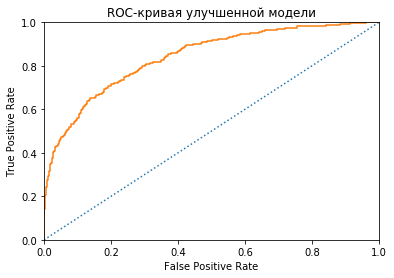

In [43]:
plt.figure()
plt.plot([0, 1], [0, 1], linestyle=':')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая улучшенной модели')
plt.show()

In [44]:
auc_roc = roc_auc_score (target_valid , probabilities_one_valid)
print(auc_roc)

0.8414311241065627


#### AUC-ROC улучшенной модели возрасла с 0.78 до 0.84.